In [1]:
# IMPORT MODULES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer, accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN


# Model training with the 2000 instances of the dataset

In [2]:
data = pd.read_csv('../eda/data_3_targets.csv')
data

,image_id,age_approximate,sex,melanoma,seborrheic_keratosis,neither,red_mode,green_mode,blue_mode,red_median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,ISIC_0000000,55,female,0,0,1,65,51,57,94,...,5.098648,0.109615,2.625431,0.508180,11.428232,10.780367,0.012018,0.329654,0.006513,0.046969
1,ISIC_0000001,30,female,0,0,1,87,53,46,116,...,4.441031,0.140831,2.777913,0.575211,2.318644,4.577623,0.021560,0.808480,0.006020,0.124740
2,ISIC_0000002,60,female,1,0,0,162,120,114,161,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
3,ISIC_0000003,30,male,0,0,1,182,128,51,161,...,2.581140,0.216727,2.214528,0.542617,2.665591,3.318969,0.040507,0.119264,0.000637,0.080628
4,ISIC_0000004,80,male,1,0,0,192,132,171,192,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ISIC_0015220,75,male,0,1,0,120,36,20,136,...,3.702858,0.155806,4.435975,0.188760,213.351940,11.504115,0.014350,0.271341,0.005850,0.070004
1996,ISIC_0015233,60,male,0,1,0,71,124,101,115,...,4.671226,0.112319,3.028206,0.536858,2.644843,11.205961,0.007821,0.237932,0.001880,0.042187
1997,ISIC_0015260,55,female,0,1,0,76,21,13,77,...,2.564094,0.197151,4.190389,0.181698,164.827636,8.735373,0.009154,0.904079,0.002138,0.132170
1998,ISIC_0015284,75,male,1,0,0,136,19,6,143,...,11.609996,0.069719,4.160087,0.526389,5.469382,2.553310,0.009927,2.045905,0.003094,0.333450


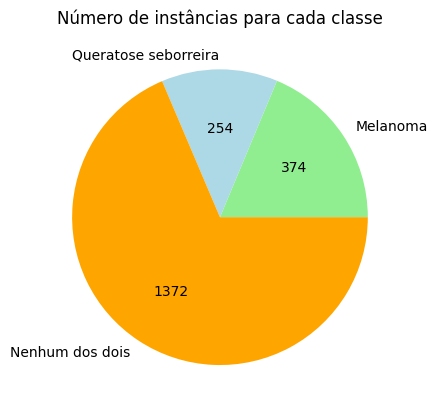

In [3]:
counts = np.array([(data["melanoma"].values == 1).sum(),
          (data["seborrheic_keratosis"].values == 1).sum(),
          (data["neither"].values == 1).sum()])

colors = ['lightgreen', 'lightblue', 'orange']

classes = "Melanoma", "Queratose seborreira", "Nenhum dos dois"

def absolute_value(val):
    a  = np.round(val/100.*counts.sum(), 0)
    return int(a)


plt.pie(counts, labels=classes, colors=colors, autopct=absolute_value)
plt.title('Número de instâncias para cada classe')
plt.show()

In [4]:
data = data.drop(columns=["age_approximate", "sex"])

In [5]:
# diagnostic column:
## 1 - melanoma, 2 - seborrheic keratosis, 3 - neither

for i,u in enumerate(data['image_id']):
    if data.loc[i,'melanoma'] == 0:
        if data.loc[i,'seborrheic_keratosis'] == 1:
            data.loc[i,'melanoma'] = 2
    else:
        continue
        
data.drop(columns=['seborrheic_keratosis', 'neither'], inplace=True)
data

,image_id,melanoma,red_mode,green_mode,blue_mode,red_median,green_median,blue_median,red_iqr,green_iqr,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,ISIC_0000000,0,65,51,57,94,79,84,67,65,...,5.098648,0.109615,2.625431,0.508180,11.428232,10.780367,0.012018,0.329654,0.006513,0.046969
1,ISIC_0000001,0,87,53,46,116,72,55,86,58,...,4.441031,0.140831,2.777913,0.575211,2.318644,4.577623,0.021560,0.808480,0.006020,0.124740
2,ISIC_0000002,1,162,120,114,161,131,131,26,52,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
3,ISIC_0000003,0,182,128,51,161,110,71,60,57,...,2.581140,0.216727,2.214528,0.542617,2.665591,3.318969,0.040507,0.119264,0.000637,0.080628
4,ISIC_0000004,1,192,132,171,192,128,157,36,44,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ISIC_0015220,2,120,36,20,136,57,46,46,47,...,3.702858,0.155806,4.435975,0.188760,213.351940,11.504115,0.014350,0.271341,0.005850,0.070004
1996,ISIC_0015233,2,71,124,101,115,80,63,97,73,...,4.671226,0.112319,3.028206,0.536858,2.644843,11.205961,0.007821,0.237932,0.001880,0.042187
1997,ISIC_0015260,2,76,21,13,77,40,24,65,51,...,2.564094,0.197151,4.190389,0.181698,164.827636,8.735373,0.009154,0.904079,0.002138,0.132170
1998,ISIC_0015284,1,136,19,6,143,80,58,52,76,...,11.609996,0.069719,4.160087,0.526389,5.469382,2.553310,0.009927,2.045905,0.003094,0.333450


In [6]:
# separate features and target
X = data.drop(columns=["image_id", "melanoma"])
y = data['melanoma']

In [7]:
# train test split to feed the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
# feature seletion through RFE
rfe = RFE(estimator = LogisticRegression(max_iter=10000), n_features_to_select=5 , step=1)

_ = rfe.fit(X_train, y_train)

In [13]:
# Let's build the model and train it
forest = LogisticRegression(max_iter=10000)

_ = forest.fit(rfe.transform(X_train), y_train)

print('Accuracy on training: ',_.score(rfe.transform(X_train), y_train))

Accuracy on training:  0.69


In [14]:
# Let's predict on the test data
y_predF = _.predict(rfe.transform(X_test))

print(classification_report(y_test, y_predF))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80       336
           1       1.00      0.02      0.04        93
           2       0.33      0.06      0.10        71

    accuracy                           0.67       500
   macro avg       0.67      0.35      0.31       500
weighted avg       0.69      0.67      0.56       500



In [11]:
# bom valor de accuracy mas baixo recall para as duas classes minoritárias (problema! modelo não generalizável)

# Now let's upsample the minority classes 

In [15]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

<AxesSubplot:title={'center':'Class distribution before appying SMOTE'}, xlabel='diagnostics'>

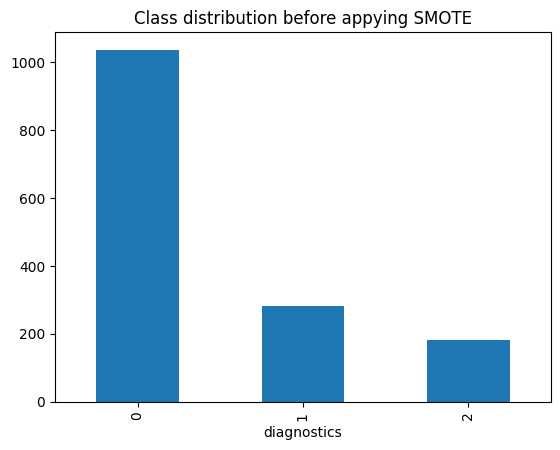

In [16]:
# Let's see the original distribution of the data
pd.Series(y_train).value_counts().plot(kind='bar', title='Class distribution before appying SMOTE', xlabel='diagnostics')

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='diagnostics'>

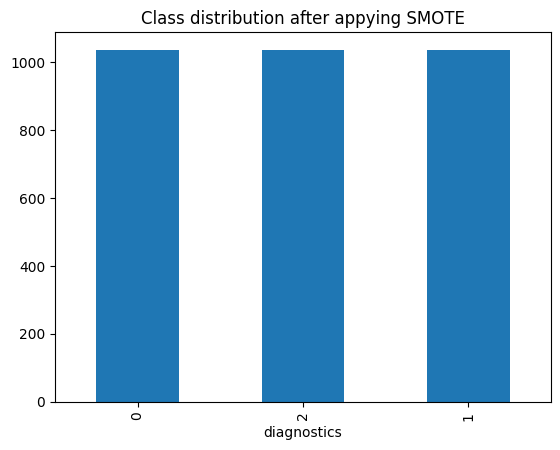

In [17]:
# The distribution of the data after SMOTE applied
pd.Series(y_train_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='diagnostics')

In [18]:
# Feature selection
rfe = RFE(estimator = LogisticRegression(max_iter=10000), n_features_to_select=15 , step=2)

_ = rfe.fit(X_train_resampled, y_train_resampled)

In [25]:
# tunning Log_Reg
model = LogisticRegression(max_iter=10000)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2']
space['C'] = [100, 10, 1.0, 0.1, 0.01]

# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(rfe.transform(X_train_resampled), y_train_resampled)

# print best parameters
print(result.best_params_)

# print best accuracy
print(result.best_score_)


{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.546864433150088


In [26]:
y_predF = result.predict(rfe.transform(X_test))

In [27]:
print(classification_report(y_test, y_predF))


              precision    recall  f1-score   support

           0       0.80      0.58      0.67       336
           1       0.28      0.31      0.30        93
           2       0.25      0.55      0.35        71

    accuracy                           0.52       500
   macro avg       0.44      0.48      0.44       500
weighted avg       0.62      0.52      0.55       500



# Using SMOTE to upsampling minority classes to 50% of the majority class

In [28]:
data_50 = pd.read_csv('../dataset_versions/50neither_vs_mel_keratosis.csv')
data_50.head()

,image_id,age_approximate,sex,melanoma,seborrheic_keratosis,neither,red_mode,green_mode,blue_mode,red_median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,ISIC_0000001,30,female,0,0,1,87,53,46,116,...,4.441031,0.140831,2.777913,0.575211,2.318644,4.577623,0.021560,0.808480,0.006020,0.124740
1,ISIC_0000002,60,female,1,0,0,162,120,114,161,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
2,ISIC_0000004,80,male,1,0,0,192,132,171,192,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424
3,ISIC_0000006,25,female,0,0,1,213,123,100,187,...,0.999912,0.641466,2.115149,0.592953,1.629161,14.107023,0.048779,0.049819,0.004353,0.046243
4,ISIC_0000009,30,female,0,0,1,187,122,90,194,...,1.866512,0.433151,2.553233,0.598177,1.871148,33.795948,0.021462,0.065349,0.016073,0.021467


In [29]:
data_50 = data_50.drop(columns=["age_approximate", "sex"])

In [30]:
# diagnostic column:
## 1 - melanoma, 2 - seborrheic keratosis, 3 - neither

for i,u in enumerate(data_50['image_id']):
    if data_50.loc[i,'melanoma'] == 0:
        if data_50.loc[i,'seborrheic_keratosis'] == 1:
            data_50.loc[i,'melanoma'] = 2
    else:
        continue
        
data_50.drop(columns=['seborrheic_keratosis', 'neither'], inplace=True)
data_50

,image_id,melanoma,red_mode,green_mode,blue_mode,red_median,green_median,blue_median,red_iqr,green_iqr,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,ISIC_0000001,0,87,53,46,116,72,55,86,58,...,4.441031,0.140831,2.777913,0.575211,2.318644,4.577623,0.021560,0.808480,0.006020,0.124740
1,ISIC_0000002,1,162,120,114,161,131,131,26,52,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
2,ISIC_0000004,1,192,132,171,192,128,157,36,44,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424
3,ISIC_0000006,0,213,123,100,187,152,130,38,76,...,0.999912,0.641466,2.115149,0.592953,1.629161,14.107023,0.048779,0.049819,0.004353,0.046243
4,ISIC_0000009,0,187,122,90,194,138,100,35,60,...,1.866512,0.433151,2.553233,0.598177,1.871148,33.795948,0.021462,0.065349,0.016073,0.021467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,ISIC_0015220,2,120,36,20,136,57,46,46,47,...,3.702858,0.155806,4.435975,0.188760,213.351940,11.504115,0.014350,0.271341,0.005850,0.070004
1310,ISIC_0015233,2,71,124,101,115,80,63,97,73,...,4.671226,0.112319,3.028206,0.536858,2.644843,11.205961,0.007821,0.237932,0.001880,0.042187
1311,ISIC_0015260,2,76,21,13,77,40,24,65,51,...,2.564094,0.197151,4.190389,0.181698,164.827636,8.735373,0.009154,0.904079,0.002138,0.132170
1312,ISIC_0015284,1,136,19,6,143,80,58,52,76,...,11.609996,0.069719,4.160087,0.526389,5.469382,2.553310,0.009927,2.045905,0.003094,0.333450


In [31]:
# separate features and target
X = data_50.drop(columns=["image_id", "melanoma"])
y = data_50['melanoma']
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<AxesSubplot:title={'center':'Class distribution before appying SMOTE'}, xlabel='diagnostics'>

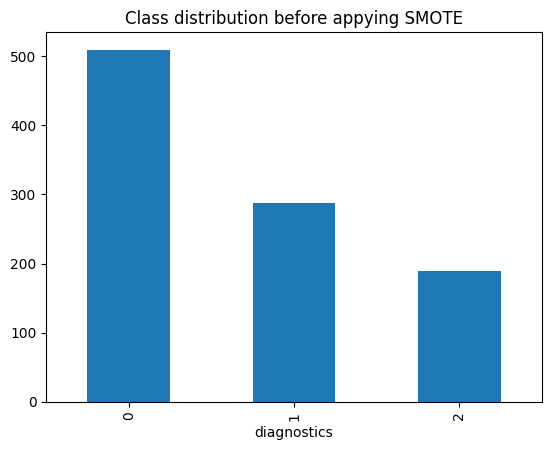

In [33]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Class distribution before appying SMOTE', xlabel='diagnostics')

In [34]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='diagnostics'>

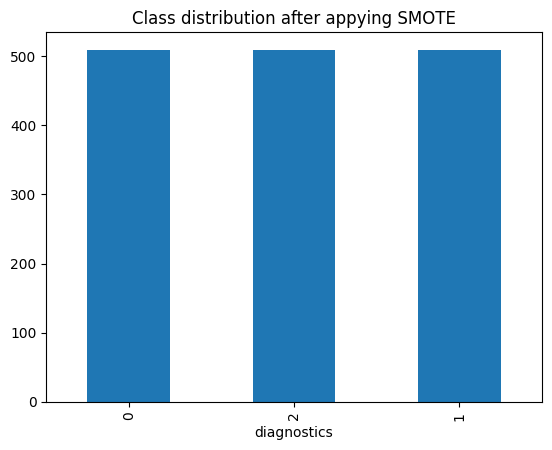

In [35]:
pd.Series(y_train_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='diagnostics')

In [36]:
rfe = RFE(estimator = LogisticRegression(max_iter=10000), n_features_to_select=4 , step=2)

_ = rfe.fit(X_train_resampled, y_train_resampled)

c:\users\utilizador\projects\aa_meb\aaenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# tunning Log_Reg
model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2']
space['C'] = [100, 10, 1.0, 0.1, 0.01]

# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(rfe.transform(X_train_resampled), y_train_resampled)

# print best parameters
print(result.best_params_)

# print best accuracy
print(result.best_score_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.4820132438940489


In [38]:
y_predF = result.predict(rfe.transform(X_test))

print(classification_report(y_test, y_predF))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55       177
           1       0.31      0.31      0.31        87
           2       0.31      0.46      0.37        65

    accuracy                           0.44       329
   macro avg       0.41      0.42      0.41       329
weighted avg       0.47      0.44      0.45       329



# Let´s use SMOTEENN (a combination of SMOTE (oversampling technique) and ENN (an undersampling tecnhique))

In [42]:
smt = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='diagnostics'>

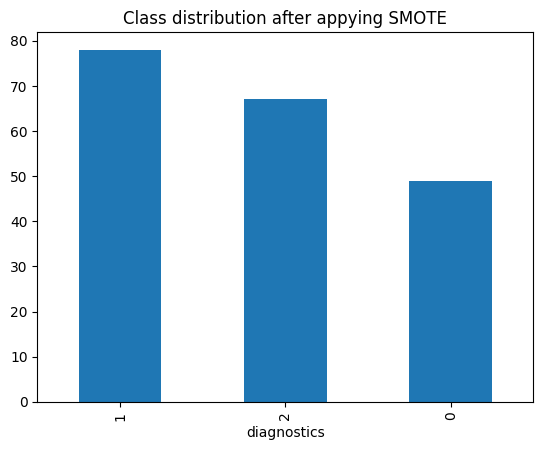

In [43]:
pd.Series(y_train_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='diagnostics')

In [41]:
rfe = RFE(estimator = LogisticRegression(max_iter=10000), n_features_to_select=12 , step=1)

_ = rfe.fit(X_train_resampled, y_train_resampled)

c:\users\utilizador\projects\aa_meb\aaenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\utilizador\projects\aa_meb\aaenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

c:\users\utilizador\projects\aa_meb\aaenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\utilizador\projects\aa_meb\aaenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

c:\users\utilizador\projects\aa_meb\aaenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# tunning Log_Reg
model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2']
space['C'] = [100, 10, 1.0, 0.1, 0.01]


# define search
search = GridSearchCV(model, space, scoring="accuracy", n_jobs=-1, cv=cv)

# execute search
result = search.fit(rfe.transform(X_train_resampled), y_train_resampled)

# print best parameters
print(result.best_params_)

# print best accuracy
print(result.best_score_)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6157894736842107


In [45]:
y_predF = result.predict(rfe.transform(X_test))

print(classification_report(y_test, y_predF))

              precision    recall  f1-score   support

           0       0.65      0.31      0.42       177
           1       0.30      0.52      0.38        87
           2       0.30      0.45      0.36        65

    accuracy                           0.39       329
   macro avg       0.42      0.42      0.39       329
weighted avg       0.49      0.39      0.40       329

